In [1]:
import numpy as np
import matplotlib.pyplot as plt
nx = 1024
ny = 1024
radius = 20

In [2]:
def henonmap(z,mu,k):
    z = z*np.exp(-1j*np.pi*mu)
    z = z - 1j*k*z.real**2 - 1.0e-4*1j*k*z.real**3
    z = z*np.exp(-1j*np.pi*mu)
    ilost = np.abs(z.real) > radius
    z[ilost] = 0.0
    return z,ilost

In [3]:
def getTBTs(mu,k,nTurn):
    z = np.zeros([nx*ny])+1j*np.zeros([nx*ny])
    ilost = np.zeros([nx*ny],dtype=np.int)
    i=0
    for x0 in np.linspace(-2,2,nx):
        for p0 in np.linspace(-2,2,ny):
            z[i] = x0+1j*p0
            i=i+1
            
    TBTF = np.zeros([nTurn,nx*ny],np.complex)
    for i in range(nTurn):
        TBTF[i,:] =  z[:]
        z,tmp = henonmap(z,mu,k)
        ilost = ilost + tmp
        
    TBTF2 = np.zeros([nTurn,nx*ny],np.complex)
    for i in range(nTurn):
        TBTF2[i,:] =  z[:]
        z,tmp = henonmap(z,mu,k)
        ilost = ilost + tmp

        
    TBTB = np.zeros([nTurn,nx*ny],np.complex)
    z = TBTF2[0,:]
    for i in range(nTurn):
        z,tmp = henonmap(z,-mu,-k)
        ilost = ilost + tmp
        TBTB[i,:] =  z[:]
    
    iLive = ilost == 0
        
    return TBTF[:,iLive],TBTF2[:,iLive],TBTB[:,iLive]

In [4]:
def getDA(mu,k,nturn):
    TBTF,TBTF2,TBTB = getTBTs(mu,k,nturn)
    diff = TBTF[0,:]-TBTB[-1,:]
    FB0 = np.log10(np.sqrt(diff.real**2+diff.imag**2))
    f1 = plt.figure(figsize=(8,8));
    c=plt.scatter(TBTF[0,:].real,TBTF[0,:].imag,c=FB0,s=0.5,marker='s');
    plt.colorbar(c)
    return TBTF,TBTF2,TBTB,FB0

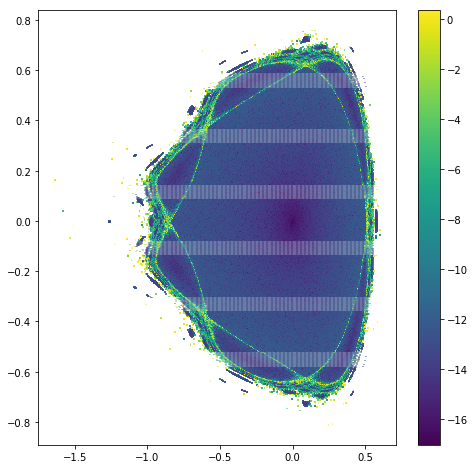

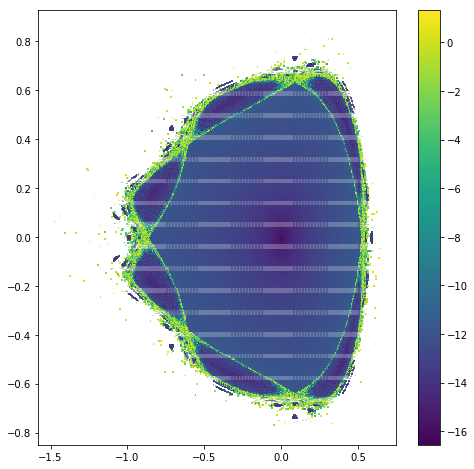

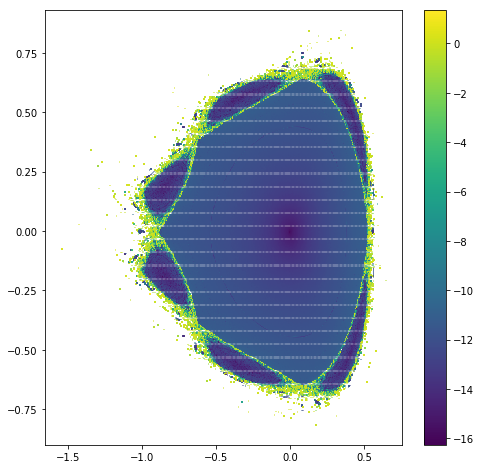

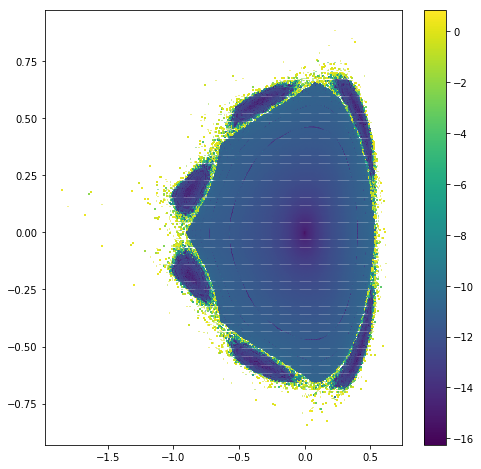

In [7]:
oldMu = np.array([0.189,0.190,0.191,0.192])
f = []
for mu in oldMu:
    f.append(getDA(mu,1.0,1024))